In [1]:
%matplotlib inline
import operator
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from datetime import datetime
bytes_dict = {}
with open('lifetime_model.txt', 'r') as f:
    first_line = True
    for line in f:
        line = line.rstrip('\n')
        if first_line:
            first_line = False
        else:
            nbdatasets, nbfiles, bytes, date, time = line.split()
            bytes_dict[datetime.strptime(date, '%Y-%m-%d')] = int(bytes)
dates = bytes_dict.keys()
dates.sort()
#print dates

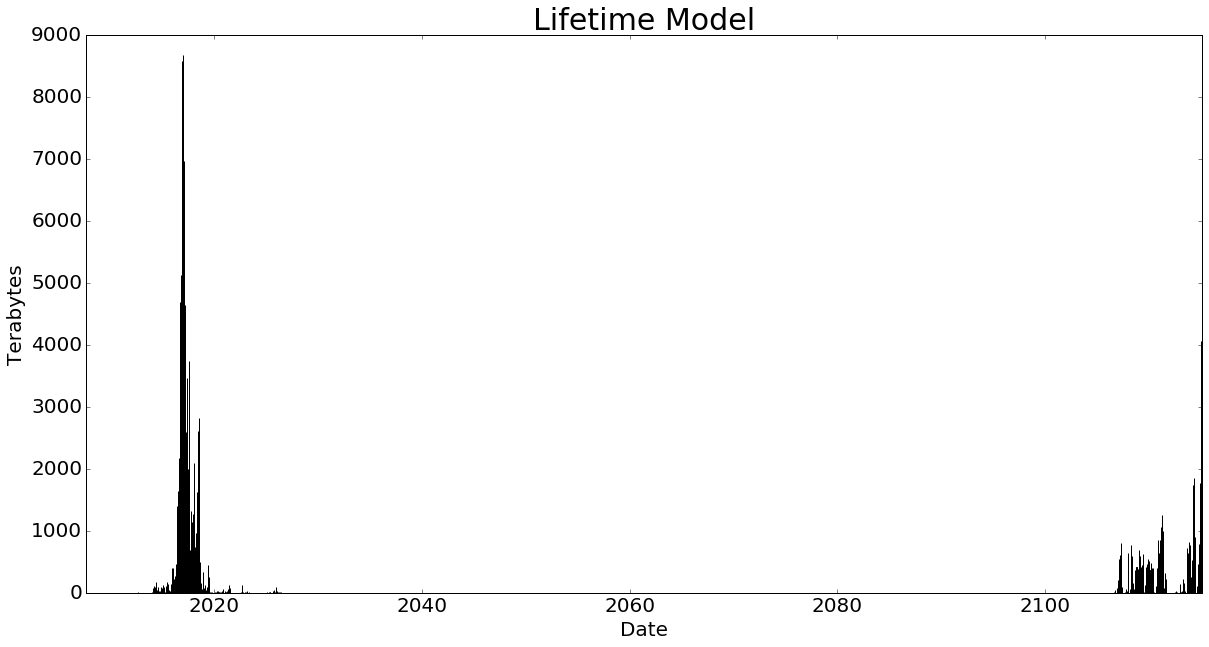

In [2]:
bytes = []
for date in dates:
    bytes.append(bytes_dict[date]/1000**4)
plt.figure(figsize=(20,10))
plt.ylabel('Terabytes', size=20)
plt.xlabel('Date', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.bar(dates, bytes)
plt.title('Lifetime Model', size=30)

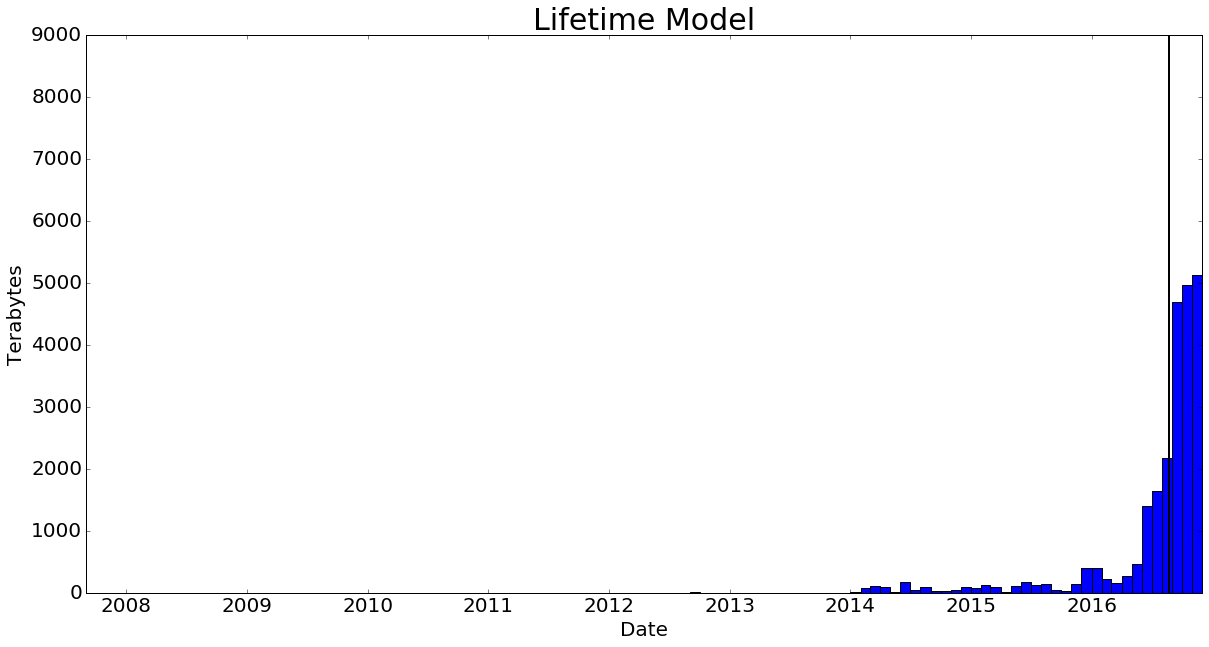

In [3]:
plt.figure(figsize=(20,10))
plt.xlim(datetime(2007, 9, 1, 0, 0), datetime(2016, 12, 1, 0, 0))
plt.ylabel('Terabytes', size=20)
plt.xlabel('Date', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.bar(dates, bytes, width=[(dates[j+1]-dates[j]).days for j in range(len(dates)-1)] + [30])
plt.plot([datetime(2016, 8, 22, 0, 0), datetime(2016, 8, 22, 0, 0)], [0, 9000], color='k', linestyle='-', linewidth=2)
plt.title('Lifetime Model', size=30)

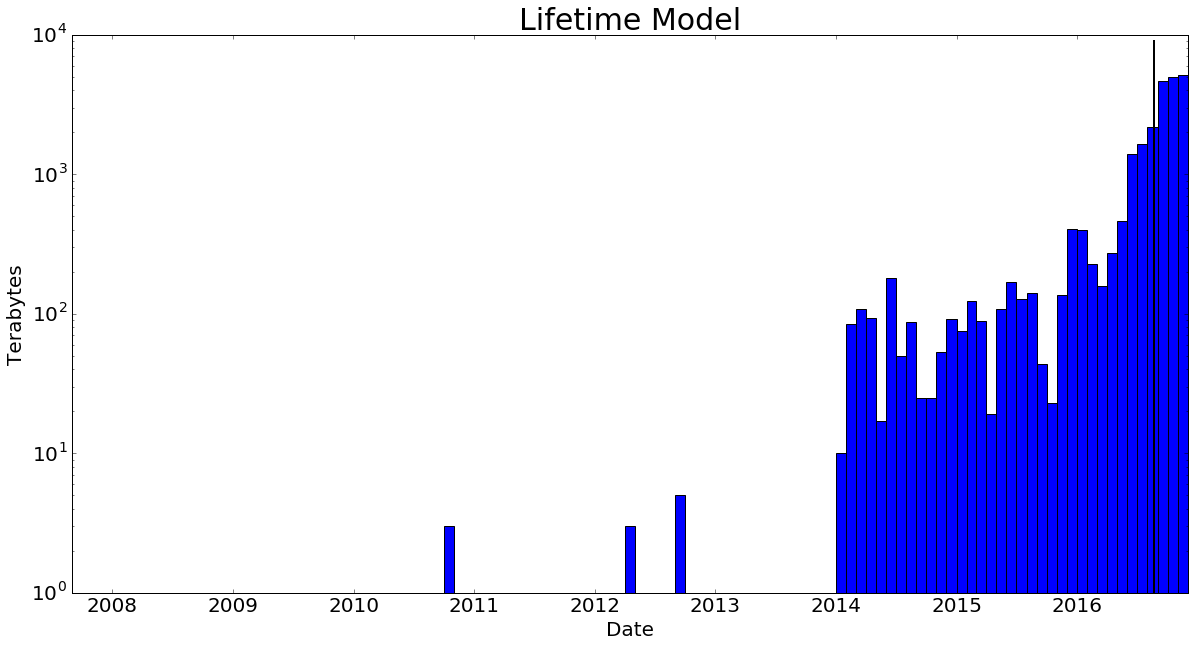

In [4]:
plt.figure(figsize=(20,10))
plt.xlim(datetime(2007, 9, 1, 0, 0), datetime(2016, 12, 1, 0, 0))
plt.ylabel('Terabytes', size=20)
plt.xlabel('Date', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.yscale('log') 
plt.bar(dates, bytes, width=[(dates[j+1]-dates[j]).days for j in range(len(dates)-1)] + [30])
plt.plot([datetime(2016, 8, 22, 0, 0), datetime(2016, 8, 22, 0, 0)], [0, 9000], color='k', linestyle='-', linewidth=2)
plt.title('Lifetime Model', size=30)

In [5]:
x, y = [], []
nb_rses = 20
first_row = True
colors = []
with open('lifetime_model2.txt', 'r') as f:
    for line in f:
        line = line.strip('\n')
        if first_row:
            first_row = False
            print line.split()
        else:
            count, length, bytes, rse = line.split()
            if len(x) < nb_rses:
                x.append(rse)
                y.append(int(bytes))
                colors.append(cm.hot(len(x)/float(nb_rses), 1))
            else:
                x[nb_rses - 1] = 'other'
                y[nb_rses - 1] += int(bytes)
                colors[nb_rses - 1] = cm.hot(1., 1)
print x, y

['COUNT(*)', 'SUM(NVL(MLENGTH,0))', 'SUM(NVL(MBYTES,0))', 'ATLAS_RUCIO.ID2RSE(RSE_ID)']
['BNL-OSG2_MCTAPE', 'CERN-PROD_DERIVED', 'BNL-OSG2_DATADISK', 'RAL-LCG2_MCTAPE', 'IN2P3-CC_MCTAPE', 'FZK-LCG2_MCTAPE', 'CERN-PROD_TZERO', 'IN2P3-CC_DATADISK', 'FZK-LCG2_DATADISK', 'CERN-PROD_DATADISK', 'RAL-LCG2_DATADISK', 'NDGF-T1_DATADISK', 'INFN-T1_DATADISK', 'TRIUMF-LCG2_MCTAPE', 'SARA-MATRIX_MCTAPE', 'INFN-T1_MCTAPE', 'BNL-OSG2_DATATAPE', 'NDGF-T1_MCTAPE', 'PIC_MCTAPE', 'other'] [1021494328488696, 580743418415621, 499841417692772, 464025651302250, 382864668370621, 370755998270541, 365808696362314, 282183392497217, 280291013998884, 231098560699806, 219410831611377, 209134447377930, 196570882482264, 193831706975110, 191885957126071, 182208122272848, 164751678988360, 143827765961228, 123317357572445, 1738466642901959]


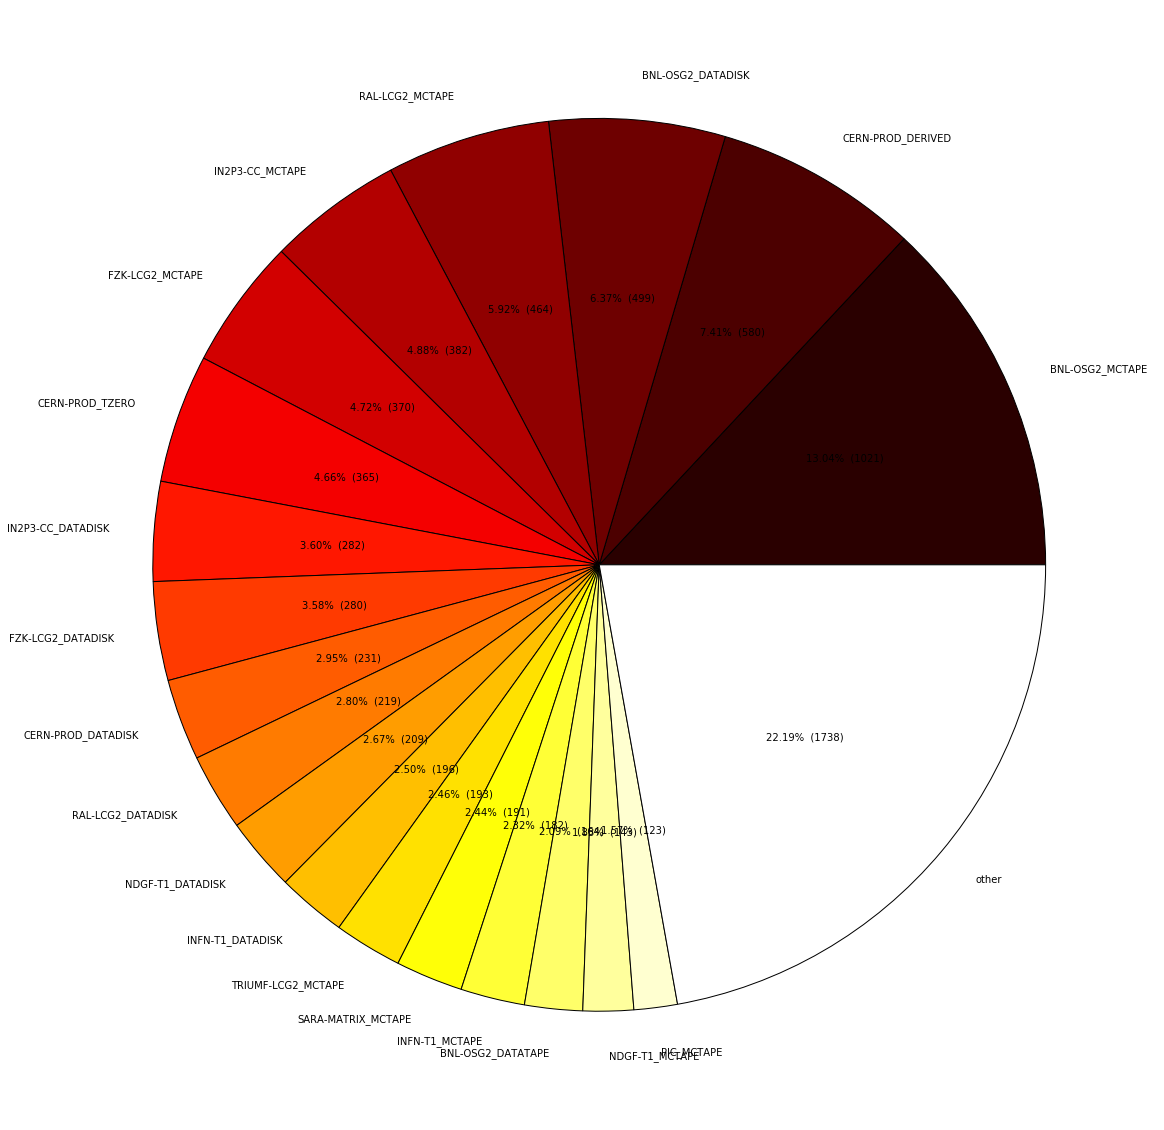

In [6]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

TBs = [_/1000**4 for _ in y]
#plt.figure(figsize=plt.figaspect(1))
plt.figure(figsize=(20,20))
plt.pie(TBs, labels=x, colors=colors, autopct=make_autopct(TBs))
plt.show()
#plt.legend()

In [7]:
x, scopes, sum_scope = [], {}, {}
nb_rses = 20
first_row = True
colors = []
with open('lifetime_model3.txt', 'r') as f:
    for line in f:
        line = line.strip('\n')
        if first_row:
            first_row = False
            print line.split()
        else:
            count, length, bytes, scope, date, time = line.split()
            date = datetime.strptime(date, '%Y-%m-%d')
            if scope not in sum_scope:
                sum_scope[scope] = 0
            if date not in scopes:
                scopes[date] = {}
            scopes[date][scope] = int(bytes)
            sum_scope[scope] += int(bytes)
            if date not in x:
                x.append(date)

x.sort()
print sum_scope
sorted_scopes = sorted(sum_scope.items(), key=operator.itemgetter(1))
sorted_scopes.reverse()
print sorted_scopes
#print x, scopes



['COUNT(*)', 'SUM(MLENGTH)', 'SUM(MBYTES)', 'SCOPE', "TRUNC(MEOL_AT,'MM')"]
{'mc15': 584330559129, 'mc_evind': 190948370223, 'mc12_2TeV': 9934777496968, 'mc12_13TeV': 1324292614885, 'data09_2TeV': 2389671622, 'cond11_data': 1851564137024, 'data11_2p76TeV': 930990143624, 'data09_900GeV': 142984679394, 'mc12_7TeV': 102098493291804, 'mc11_valid': 20461890651, 'data10_10TeV': 28390117, 'mc11_2TeV': 2854728024428, 'mc14_valid': 69552220576, 'valid1': 664701554795904, 'valid2': 102370459991726, 'valid3': 37850405304331, 'data10_7TeV': 126913970072353, 'data09_idcomm': 673125452, 'data12_cos': 98330639765, 'data12_8TeV': 704872029051594, 'data10_1beam': 103161803572, 'data08_idcomm': 548610506549, 'data09_calophys': 45790758589, 'group.proj-sit': 1451254916370, 'data09_1beam': 1790690387, 'mc11_7TeV': 267777727257012, 'data10_cos': 203469216807, 'data10_hi': 238549702097516, 'sit': 1036803026137, 'mc15_valid': 4326497001063, 'mc12_valid': 1679414566678, 'mc14_13TeV': 47333272937853, 'data11_h

In [12]:
max_scope = 1
dict_scope = {}
for i in sorted_scopes[:max_scope]:
    dict_scope[i[0]] = {}

dict_scope['other'] = {}
#print dict_scope

for date in x:
    #print date, scopes[date]
    for scope in scopes[date]:
        if scope in dict_scope:
            dict_scope[scope][date] = scopes[date][scope]
        else:
            if date not in dict_scope['other']:
                dict_scope['other'][date] = 0
            dict_scope['other'][date] += scopes[date][scope]
print dict_scope['other']

{datetime.datetime(2007, 9, 1, 0, 0): 38181798, datetime.datetime(2010, 6, 1, 0, 0): 53607901717, datetime.datetime(2013, 10, 1, 0, 0): 1298314642546, datetime.datetime(2008, 9, 1, 0, 0): 15979832447, datetime.datetime(2013, 3, 1, 0, 0): 82422190297, datetime.datetime(2015, 3, 1, 0, 0): 89080412488477, datetime.datetime(2016, 8, 1, 0, 0): 591197176374701, datetime.datetime(2012, 2, 1, 0, 0): 1891718123041, datetime.datetime(2014, 7, 1, 0, 0): 50838923710750, datetime.datetime(2010, 8, 1, 0, 0): 987227577875, datetime.datetime(2011, 6, 1, 0, 0): 214670386175, datetime.datetime(2015, 10, 1, 0, 0): 23372772079256, datetime.datetime(2012, 11, 1, 0, 0): 766591371674, datetime.datetime(2016, 3, 1, 0, 0): 130644111003943, datetime.datetime(2011, 11, 1, 0, 0): 1252382817373, datetime.datetime(2009, 9, 1, 0, 0): 17828797661, datetime.datetime(2014, 8, 1, 0, 0): 88217161533619, datetime.datetime(2011, 5, 1, 0, 0): 148275228185, datetime.datetime(2012, 5, 1, 0, 0): 1188455866123, datetime.datetim

1 0
(0.041599999999999998, 0.0, 0.0, 1.0)
1 1
(1.0, 1.0, 1.0, 1.0)


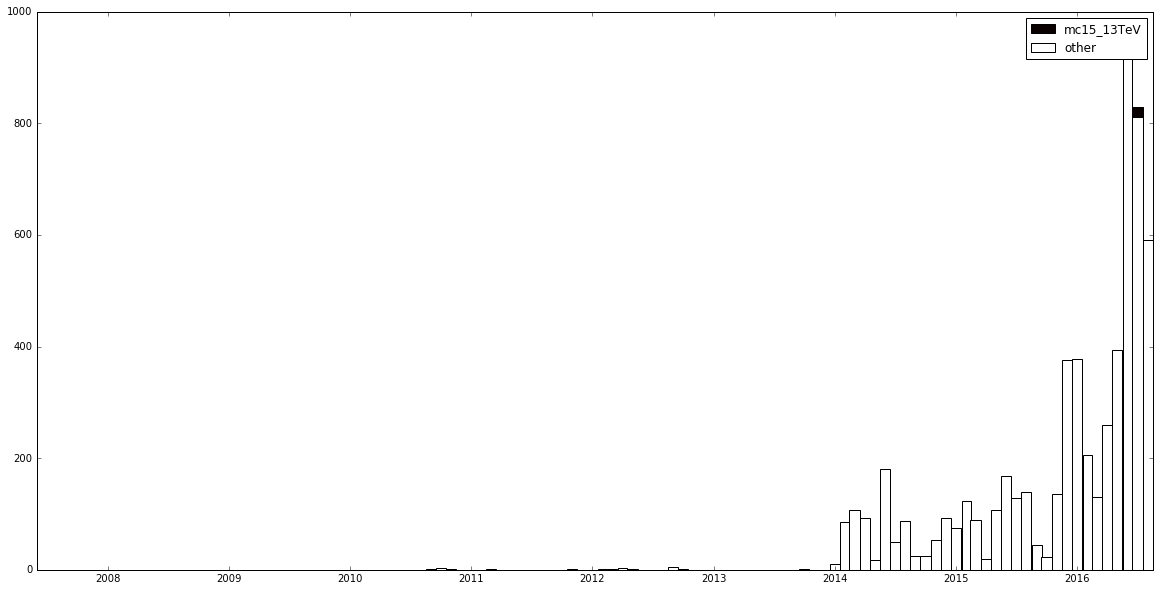

In [13]:
plt.figure(figsize=(20,10))
i = 0
for scope in dict_scope:
    y_values = []
    for date in x:
        if date in dict_scope[scope]:
            y_values.append(dict_scope[scope][date]/1000**4)
        else:
            y_values.append(0)
            
    color = cm.hot(i/float(max_scope), 1)
    print max_scope, i
    print color
    i += 1
    plt.bar(x, y_values, align="center", color=color, width=[(x[j+1]-x[j]).days for j in range(len(x)-1)] + [30],label=scope)
plt.legend()